Ax es 0.73
B es 96.20
chi-sq es:  98020.05
chi-sq mini es:  4261.74


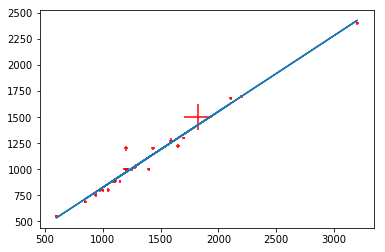

In [9]:
import random # números aleatorios
import math #funciones matematicas estandar.
import matplotlib.pyplot #Para visualizaciones y gráficos.  
import numpy #funciones estadísticas 
import seaborn as sns #para gráficos estadísticos.
from mpl_toolkits.mplot3d import axes3d #permite hacer graficas en 3D 
import pandas as pd
from scipy.optimize import curve_fit


#Datos usados en minimos cuadrados
df = pd.read_csv("datos.txt") #archivo .txt de los datos
tab = pd.crosstab(df["xvalor"],df["yvalor"],margins=True)  #Crea tabla (conocidas como crosstabs) en pandas
xd=df["xvalor"] #definiendo valor de x
yd= df["yvalor"] #definiendo valor de y
xerror =df["xerror"] #error x
yerror =df["yerror"] #error y

#funcion 
def func(x, a, b):
    return a*x + b #funcion deseada

#ctes del modelo
p , q= curve_fit(func, xd, yd)
print 'Ax es',("%.2f" %p[0])
print 'B es',("%.2f" %p[1])

#Obtener Chisq y chisqmin
chisq = numpy.sum((func(xd, *p)-yd)**2) 
chisqmini = (chisq)/(len(xd)-len(p)) 
print 'chi-sq es: ',("%.2f" %chisq)
print 'chi-sq mini es: ',("%.2f" %chisqmini)



matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(xd, yd, s=0)
matplotlib.pyplot.plot(xd,func(xd, *p))
matplotlib.pyplot.errorbar(xd, yd, xerr=xerror, yerr=yerror, linestyle="", color='red')
matplotlib.pyplot.show()